In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from demographicmodel import DemographicModel

In [14]:
data_dir = '../fastNeutrino/fitted_params/'
chroms = ['Chr2L', 'Chr2R', 'Chr3L', 'Chr3R']
model_types = ['2EpochC',
                '2EpochE',
                '3EpochCC',
                '3EpochCE',
                '3EpochEE']

In [15]:
models = {}
for mt in model_types:
    models[mt] = [DemographicModel(data_dir + chrom + '.' + mt + '.txt') for chrom in chroms]

/Users/dpr/mmc_genomics/src/demographicmodel.py:75: RuntimeWarning: overflow encountered in exp
  return n0*np.exp(-(T-t0)*r)
/Users/dpr/mmc_genomics/src/demographicmodel.py:75: RuntimeWarning: overflow encountered in multiply
  return n0*np.exp(-(T-t0)*r)
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


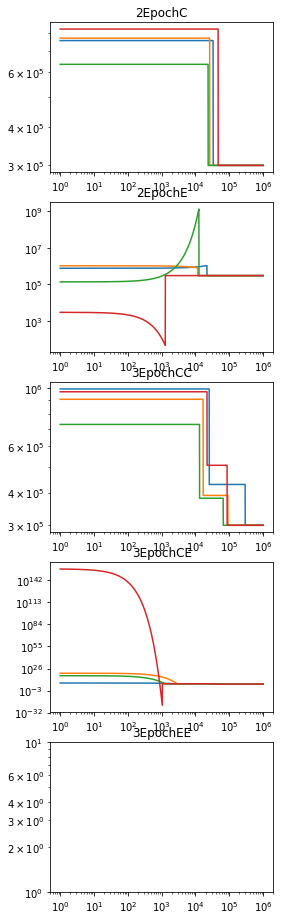

In [16]:
t = np.arange(1e6)
fig = plt.figure(figsize=(4,16))
for i, mt in enumerate(model_types):
    ax = fig.add_subplot(len(model_types), 1, i+1)
    for model in models[mt]:
        ax.loglog(t, model.population_size(t))
    ax.set_title(mt)    
    # plt.ylim([1e5,1e6])

Conclusions: the exponential growth leads to some really unstable results. On the other hand, the constant-size inference seems to be stable and consistent across populations. We should preoceed with that.